# Import Files from Kaggle

In [ ]:
!pip install gdown

In [ ]:
# Download the kaggle API json from my kaggle account which I uploaded to my gdrive
!gdown https://drive.google.com/uc?id=1fTgTIN9pgbEuQ3MIzgL3efQ0L87Udu-d

Downloading...
From: https://drive.google.com/uc?id=1fTgTIN9pgbEuQ3MIzgL3efQ0L87Udu-d
To: /content/kaggle.json
100% 70.0/70.0 [00:00<00:00, 336kB/s]


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d safurahajiheidari/kidney-stone-images

Dataset URL: https://www.kaggle.com/datasets/safurahajiheidari/kidney-stone-images
License(s): other
 43% 9.00M/21.1M [00:00<00:00, 36.0MB/s]
100% 21.1M/21.1M [00:00<00:00, 70.5MB/s]


In [ ]:
!unzip kidney-stone-images.zip

Archive:  kidney-stone-images.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
  inflating: test/images/1-3-46-670589-33-1-63703718086120120200001-5487554579919763006_png_jpg.rf.9fd67251e99a47dbe83a5db6efe6c016.jpg  
  inflating: test/images/1-3-46-670589-33-1-63705534438365105500001-5275982036206127404_png_jpg.rf.365c4daf2b772012fe47e07b9daec86e.jpg  
  inflating: test/images/1-3-46-670589-33-1-63705540012666937300001-5673688970564737961_png_jpg.rf.15cca2fecc5f56865de3eb405476b90d.jpg  
  inflating: test/images/1-3-46-670589-33-1-63705542123217653900001-5305208767418446842_png_jpg.rf.d6f32a0ac819e4f2a870edfc1ce8079b.jpg  
  inflating: test/images/1-3-46-670589-33-1-63705542123253656000001-4874858110489948158_png_jpg.rf.d79767eb8378783858ea648a8852c859.jpg  
  inflating: test/images/1-3-46-670589-33-1-63706052409136049800001-4885266517035478638_png_jpg.rf.403057fc6d27ba2b8a1020faf23ea6e8.jpg  
  inflating: test/images

# Import Required Libraries

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 24.4 MB/s eta 0:00:00


In [ ]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import os

from IPython.display import display
from ultralytics import YOLO
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Create the yaml file

In [ ]:
with open('kidney_stone.yaml', 'w') as f:
    f.write('train: /content/train/images\n')
    f.write('val: /content/valid/images\n')
    f.write('test: /content/test/images\n')
    f.write('nc: 1\n')
    f.write("names: ['stone']\n")

# Hyperparameter Tuning

In [ ]:
model = YOLO("yolo11m.pt")

100%|██████████| 38.8M/38.8M [00:00<00:00, 127MB/s]


In [ ]:
model.tune(data="kidney_stone.yaml", epochs=30, iterations=10, optimizer="auto", plots=False, save=False, val=False)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 1/10 iterations complete ✅ (1213.21s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.35984 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79325, 'metrics/recall(B)': 0.70462, 'metrics/mAP50(B)': 0.7397, 'metrics/mAP50-95(B)': 0.31764, 'val/box_loss': 1.91574, 'val/cls_loss': 0

# Model Training

In [ ]:
model = YOLO('runs/detect/tune/weights/best.pt')
results = model.train(data="kidney_stone.yaml", epochs=100, imgsz=640, project='Kidney Stone', name='yolo_v11')

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/tune/weights/best.pt, data=kidney_stone.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Kidney Stone, name=yolo_v11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

train: Scanning /content/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to Kidney Stone/yolo_v11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to Kidney Stone/yolo_v11
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.69G      1.907     0.9697       1.18         40        640: 100%|██████████| 66/66 [00:42<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        123        325       0.73      0.677      0.663       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.69G      1.962      1.031      1.197         47        640: 100%|██████████| 66/66 [00:40<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        123        325      0.733      0.628      0.628       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.71G      1.999       1.09      1.214         41        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325      0.561      0.445      0.458      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.68G      2.017      1.132      1.239         48        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.493       0.58      0.479      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.74G      2.037        1.1      1.219         48        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        123        325      0.683      0.578      0.621      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.69G      2.002      1.092      1.243         38        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        325      0.747      0.631      0.676      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.74G      2.022      1.084      1.226         51        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        123        325      0.711      0.583      0.615      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.77G      2.014      1.085      1.239         71        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        325      0.661      0.538      0.546      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.67G       2.03      1.071      1.223         41        640: 100%|██████████| 66/66 [00:39<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.659      0.529      0.527      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.75G      1.976      1.051      1.216         40        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.771      0.665      0.691      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.69G      1.986      1.041      1.225         44        640: 100%|██████████| 66/66 [00:39<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325      0.817      0.628       0.68      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.71G      1.976       1.03      1.222         49        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        123        325      0.774      0.665      0.712      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.67G      1.963      1.025      1.213         37        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.721      0.668      0.671      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.69G      1.977      1.039      1.211         58        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        123        325      0.737      0.637      0.672      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.74G      1.952      1.029      1.224         27        640: 100%|██████████| 66/66 [00:40<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        123        325      0.796       0.65      0.701      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       8.7G      1.963      1.029      1.209         40        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325      0.756      0.557      0.618      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.68G      1.991      1.045      1.228         51        640: 100%|██████████| 66/66 [00:39<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        123        325      0.752      0.643      0.682      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.73G      1.957     0.9948      1.192         46        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        123        325      0.747      0.625      0.656      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.68G      1.955      1.008      1.191         36        640: 100%|██████████| 66/66 [00:39<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        123        325      0.776       0.68      0.718       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.69G      1.935      0.981      1.197         41        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.737      0.658      0.691      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       8.7G      1.903     0.9741      1.184         48        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        123        325      0.722      0.738      0.747      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.72G      1.896     0.9797       1.18         36        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        123        325      0.798      0.686      0.721       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.68G      1.959     0.9865       1.18         44        640: 100%|██████████| 66/66 [00:40<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        123        325      0.721      0.674      0.652      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       8.7G      1.896     0.9645      1.203         65        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        123        325       0.83      0.708      0.745      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.67G      1.891     0.9579      1.158         44        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325       0.78      0.591      0.637      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.73G      1.898     0.9575      1.168         54        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        325      0.798      0.683      0.742      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       8.7G      1.923     0.9759      1.158         55        640: 100%|██████████| 66/66 [00:40<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        123        325        0.8      0.674      0.701      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.68G      1.903     0.9636      1.151         21        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325      0.705      0.726      0.703      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.68G      1.908     0.9555      1.172         34        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        123        325      0.768      0.714      0.717      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.69G      1.868      0.929      1.168         33        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        123        325      0.741      0.649      0.696       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.68G      1.899     0.9391      1.159         55        640: 100%|██████████| 66/66 [00:40<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        123        325      0.807       0.68      0.723      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.76G      1.867      0.923      1.135         41        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        123        325      0.791      0.686      0.718      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.69G      1.812     0.9003      1.148         58        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        123        325      0.747      0.663      0.683      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.69G      1.838      0.899      1.144         30        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325      0.759      0.637      0.659      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.75G      1.835     0.9054      1.146         42        640: 100%|██████████| 66/66 [00:40<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        123        325      0.778      0.677      0.718      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.76G      1.871     0.9212      1.144         44        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        325      0.761       0.68      0.732      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.69G      1.827     0.9067      1.143         67        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        123        325      0.814      0.699      0.729      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.69G      1.823     0.8968      1.134         53        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        123        325      0.748      0.643      0.689      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.68G      1.813     0.8646      1.125         69        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        123        325      0.798      0.702      0.736      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.69G      1.846     0.8971      1.144         62        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        123        325      0.812      0.671      0.707      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.69G      1.823     0.8825      1.153         41        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325       0.79      0.677      0.722      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.76G      1.769     0.8613      1.121         30        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        123        325       0.75      0.668      0.703      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.68G       1.76     0.8626      1.106         40        640: 100%|██████████| 66/66 [00:40<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.775      0.705      0.733      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.72G      1.797     0.8573      1.116         42        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        123        325      0.757      0.738      0.757      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.69G      1.818     0.8747      1.114         42        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        325       0.77      0.708      0.744      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.77G      1.753      0.845      1.109         49        640: 100%|██████████| 66/66 [00:39<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        123        325      0.774      0.698      0.748      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.68G      1.829     0.8829      1.129         51        640: 100%|██████████| 66/66 [00:40<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        123        325      0.786      0.735      0.773      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.74G      1.787     0.8544      1.134         51        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.781      0.678      0.725      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.67G      1.782     0.8513      1.112         38        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        123        325      0.786        0.7      0.735      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.68G      1.757     0.8388      1.102         34        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        325      0.828      0.668      0.734      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.68G      1.711     0.8139      1.108         54        640: 100%|██████████| 66/66 [00:40<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        123        325      0.795      0.723      0.759        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.69G      1.761     0.8365      1.103         35        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        325      0.786       0.72      0.754      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.67G      1.732     0.8294      1.088         57        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        123        325      0.755      0.711      0.747       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.69G      1.697     0.8031        1.1         58        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.772      0.748      0.742      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.67G      1.722     0.8394      1.094         65        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        123        325      0.786      0.698      0.741      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.73G      1.684     0.8057      1.081         62        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        325       0.79      0.702      0.716       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.69G      1.681     0.8172      1.089         54        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        123        325      0.743      0.702      0.716      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.71G      1.699     0.8107      1.095         36        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        123        325      0.749      0.695      0.744      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.69G      1.683     0.8009      1.084         36        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        123        325      0.804       0.73      0.762      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.75G      1.675     0.7888      1.078         53        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325      0.777      0.677       0.72      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.75G      1.683     0.7952      1.073         30        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.807      0.705      0.735      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.69G      1.667     0.7942      1.081         36        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        123        325      0.735      0.717       0.72      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.69G      1.666     0.7826      1.073         35        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325        0.8      0.726      0.736      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.73G      1.623     0.7742       1.06         71        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        123        325      0.747       0.68      0.714      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.71G      1.616     0.7625      1.059         31        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.789      0.686      0.718       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.76G      1.623      0.767      1.054         51        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        123        325      0.764      0.689      0.708      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.67G      1.615     0.7643      1.067         55        640: 100%|██████████| 66/66 [00:39<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.741      0.717      0.694      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.69G      1.618     0.7703      1.064         51        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        325      0.779      0.714      0.754      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.69G      1.562     0.7367      1.042         47        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        123        325      0.733      0.711      0.715      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.71G      1.622     0.7573       1.06         49        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        325      0.773      0.686      0.705      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.72G      1.607     0.7533      1.054         53        640: 100%|██████████| 66/66 [00:39<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        123        325       0.76      0.681      0.688      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.77G      1.577     0.7388      1.043         42        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325      0.833      0.693      0.739      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       8.7G      1.547     0.7271      1.028         68        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        123        325      0.774       0.72      0.725      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.69G      1.559     0.7274      1.042         49        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325       0.76      0.701      0.699      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.67G      1.538     0.7283      1.061         56        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        123        325      0.817      0.688       0.75      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.69G       1.56     0.7392      1.033         61        640: 100%|██████████| 66/66 [00:40<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        123        325       0.77      0.723      0.739      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.69G      1.575     0.7373      1.043         50        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        123        325      0.797      0.695      0.746      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.76G      1.525     0.7218      1.039         40        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.835      0.723       0.77      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.69G      1.536     0.7192      1.036         58        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        123        325       0.79      0.695      0.717      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.72G      1.522     0.7196      1.021         32        640: 100%|██████████| 66/66 [00:40<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        123        325       0.78      0.695      0.731      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.67G      1.513     0.7104      1.021         39        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.749      0.689      0.694      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.69G      1.506     0.6971      1.012         65        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        123        325      0.816      0.695      0.744      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.68G      1.503     0.7001      1.024         42        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325      0.798      0.705      0.742      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.71G      1.464     0.6912      1.018         55        640: 100%|██████████| 66/66 [00:39<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        123        325      0.782      0.706       0.73      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.69G      1.488     0.6935      1.021         68        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325       0.77      0.729       0.73      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.69G      1.476     0.6881       1.02         60        640: 100%|██████████| 66/66 [00:39<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        123        325      0.799      0.705      0.717      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.71G      1.495     0.6983      1.016         47        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.811      0.732       0.76        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.76G      1.453     0.6793      1.018         45        640: 100%|██████████| 66/66 [00:39<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        123        325      0.802      0.726      0.745      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.69G      1.483      0.692      1.023         55        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.793      0.719       0.73      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.72G      1.454     0.6747      1.021         25        640: 100%|██████████| 66/66 [00:39<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        123        325      0.778      0.702      0.739      0.297


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.68G      1.489     0.6864       1.04         35        640: 100%|██████████| 66/66 [00:40<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        123        325      0.772      0.707      0.741      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.69G      1.435     0.6685      1.023         32        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        123        325      0.742      0.736      0.738      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.68G      1.422     0.6606      1.016         21        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        325      0.787      0.694      0.725      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.69G      1.421     0.6617      1.012         25        640: 100%|██████████| 66/66 [00:38<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.803      0.704      0.732      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.67G      1.405     0.6692      1.026         25        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.749      0.732      0.742      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.68G      1.388     0.6591      1.001         33        640: 100%|██████████| 66/66 [00:39<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        123        325      0.787      0.717      0.749      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.69G      1.393     0.6483      1.016         24        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        123        325        0.8      0.703      0.747      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.69G      1.384     0.6452      1.004         21        640: 100%|██████████| 66/66 [00:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        123        325      0.811      0.701      0.732      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.69G      1.394     0.6472      1.012         28        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        123        325      0.795      0.702       0.73      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.69G      1.369     0.6439      1.004         27        640: 100%|██████████| 66/66 [00:39<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        123        325      0.782      0.695      0.726      0.285



100 epochs completed in 1.201 hours.
Optimizer stripped from Kidney Stone/yolo_v11/weights/last.pt, 40.5MB
Optimizer stripped from Kidney Stone/yolo_v11/weights/best.pt, 40.5MB

Validating Kidney Stone/yolo_v11/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


                   all        123        325      0.787      0.738      0.776      0.318
Speed: 0.2ms preprocess, 10.1ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to Kidney Stone/yolo_v11


# Model Evaluation

In [ ]:
model = YOLO('Kidney Stone/yolo_v11/weights/best.pt')
metrics = model.val()
metrics.box.map

In [ ]:
metrics.box.map50

0.7779537667720592

In [ ]:
metrics.box.map75

0.17138249104039235

In [ ]:
metrics.box.maps

array([     0.3173])

# Model Visualization

In [ ]:
test_path = '/content/test/images'
test_list = os.listdir(test_path)
rand_img = random.sample(test_list, 9)

best_model = YOLO('Kidney Stone/yolo_v11/weights/best.pt')

In [ ]:
def show_image(img_path, model):
    img = cv2.imread(img_path)
    result = model(img)
    res_img = result[0].plot()
    res_img = cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB)
    return res_img


0: 544x640 2 stones, 44.1ms
Speed: 2.8ms preprocess, 44.1ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 stones, 34.5ms
Speed: 3.6ms preprocess, 34.5ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 stone, 34.6ms
Speed: 3.0ms preprocess, 34.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 stones, 34.5ms
Speed: 2.8ms preprocess, 34.5ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 stones, 27.0ms
Speed: 3.2ms preprocess, 27.0ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 6 stones, 25.0ms
Speed: 2.5ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 stone, 25.6ms
Speed: 2.5ms preprocess, 25.6ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 stone, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 

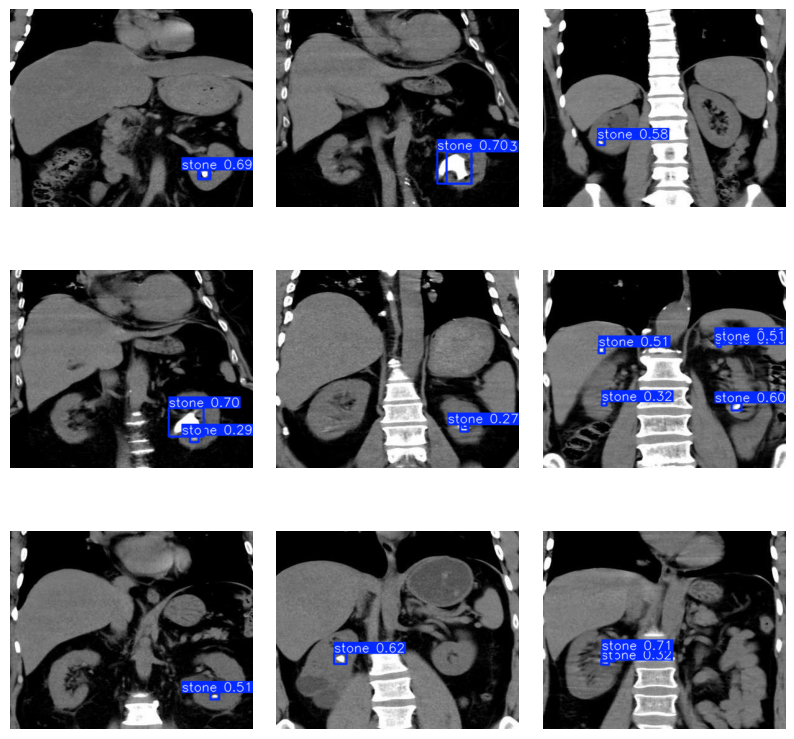

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, img_file in enumerate(rand_img):

    row_idx = i // 3
    col_idx = i % 3

    img_path = os.path.join(test_path, img_file)
    detect_img = show_image(img_path, best_model)

    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.05)

# Download the Best Weight

In [ ]:
files.download('Kidney Stone/yolo_v11/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>